<a href="https://colab.research.google.com/github/suhyun6363/what_your_personal_color/blob/kmeans_yeeun/%EC%BC%80%EC%9D%B4%EB%AF%BC%EC%A6%88~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib scikit-learn
!pip install imageio

In [19]:
# 실루엣 계수.ver
# 존내오래걸림
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import imageio


#  이미지 로드
image_path = "/content/test_img.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = np.any(face_image != [0, 0, 0], axis=-1)
face_data = face_image[non_black_pixels]


# 이미지를 2D 배열로 변환
face_data = face_image.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 클러스터 개수를 결정하기 위한 k 값 범위 설정
k_values = range(2, 5)

# 각 k 값에 대한 실루엣 스코어 저장
silhouette_scores = []

# k 값에 대한 k-means 클러스터링 수행 및 실루엣 스코어 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(face_data_scaled)
    silhouette_avg = silhouette_score(face_data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 스코어를 플로팅하여 최적의 k 값 확인
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

# 최적의 k 값 확인
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters (k): {optimal_k}')

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()


<ipython-input-19-e3423dbca459>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: ignored

<ipython-input-2-e25c4a3e8bb6>:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the 

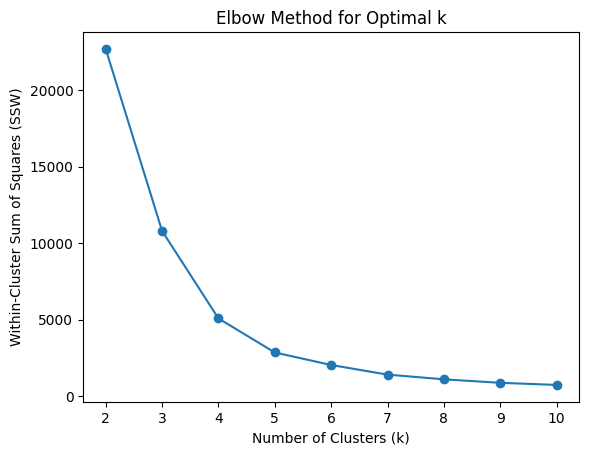

In [2]:
# 엘보우.ver
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import StandardScaler
import imageio


#  이미지 로드
image_path = "/content/test_img.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = np.any(face_image != [0, 0, 0], axis=-1)
face_data = face_image[non_black_pixels]


# 이미지를 2D 배열로 변환
face_data = face_image.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 클러스터 개수를 결정하기 위한 k 값 범위 설정
k_values = range(2, 11)

# 각 k 값에 대한 클러스터 내 제곱합(SSW) 저장
inertia_values = []

# k 값에 대한 k-means 클러스터링 수행 및 SSW 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(face_data_scaled)
    inertia_values.append(kmeans.inertia_)

# SSW를 플로팅하여 엘보우 지점 확인
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (SSW)')
plt.title('Elbow Method for Optimal k')
plt.show()


Optimal number of clusters (k): 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


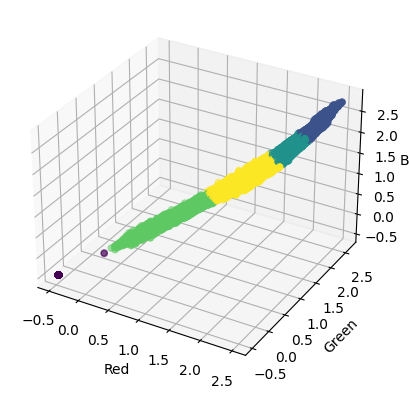

In [5]:
# 엘보우 지점 확인하여 최적의 k 값 결정
optimal_k = 5  # 여기서는 그래프를 보고 최적값을 수동으로 지정합니다.-> ??????
print(f'Optimal number of clusters (k): {optimal_k}')

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center (RGB): [0.0002635  0.00020362 0.00019463]
Cluster 2 Center (RGB): [234.90386125 214.4855904  211.53904235]
Cluster 3 Center (RGB): [208.59467531 183.71819799 173.41638073]
Cluster 4 Center (RGB): [99.49068087 79.47166223 76.81209585]
Cluster 5 Center (RGB): [179.22751638 151.97796307 142.29913639]
Cluster 6 Center (RGB): [224.31906111 201.4267503  195.31335492]


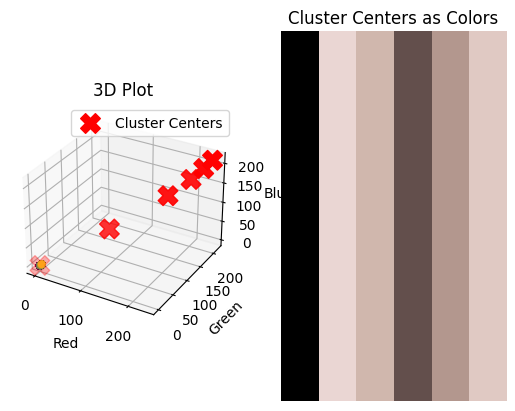

In [12]:
# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 6
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

plt.show()

